# Python Project - Movielens Case Study

## # Importing the library and Acquisition of datasets

In [1]:
# Importing Pandas into python environment

import pandas as pd

In [2]:
# Creating header names for .Dat file data

movies_headers = "movie_id::title::genres".split('::')
users_headers = "user_id::gender::age::occupation::zip".split('::')
ratings_headers = "user_id::movie_id::rating::timestamp".split('::')

In [3]:
# Viewing header names created for each .Dat file
print(movies_headers)
print(users_headers)
print(ratings_headers)

['movie_id', 'title', 'genres']
['user_id', 'gender', 'age', 'occupation', 'zip']
['user_id', 'movie_id', 'rating', 'timestamp']


In [4]:
# Creating path variable for data source files

path = 'C:/Teetu/Simplilearn/DS with Python/Project4_Movielens/'

In [5]:
pd.read_csv?

In [6]:
# importing 3 datasets movies.dat, users.dat and ratings.dat files with headers

movies = pd.read_csv(path + 'movies.dat', sep='::', names = movies_headers)
users = pd.read_csv(path + 'users.dat', sep='::', names = users_headers)
ratings = pd.read_csv(path + 'ratings.dat', sep='::', names = ratings_headers, parse_dates = ["timestamp"])

C:\Users\sinku\anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sinku\anaconda3\lib\site-packages\ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.
C:\Users\sinku\anaconda3\lib\site-packages\ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid t

In [7]:
# Looking top 5 rows of dataframe

movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
users.head()

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [9]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


#### Exploring dataset by looking total number of rows & columns and datatypes of variables

In [10]:
movies.shape

(3883, 3)

In [11]:
users.shape

(6040, 5)

In [12]:
ratings.shape

(1000209, 4)

In [13]:
movies.dtypes

movie_id     int64
title       object
genres      object
dtype: object

In [14]:
users.dtypes

user_id        int64
gender        object
age            int64
occupation     int64
zip           object
dtype: object

In [15]:
ratings.dtypes

user_id      int64
movie_id     int64
rating       int64
timestamp    int64
dtype: object

## # Creating new Master dataset by joining three datasets

In [16]:
movies_ratings = pd.merge(movies, ratings, on = "movie_id")
movies_ratings.head()

,movie_id,title,genres,user_id,rating,timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [17]:
master_data = pd.merge(movies_ratings, users, on = "user_id")
master_data.head()

,movie_id,title,genres,user_id,rating,timestamp,gender,age,occupation,zip
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [18]:
# Checking for NULL values in the master dataset

master_data.isnull().sum()

movie_id      0
title         0
genres        0
user_id       0
rating        0
timestamp     0
gender        0
age           0
occupation    0
zip           0
dtype: int64

In [19]:
master_data.columns

Index(['movie_id', 'title', 'genres', 'user_id', 'rating', 'timestamp',
       'gender', 'age', 'occupation', 'zip'],
      dtype='object')

In [20]:
# Keeping intersting columns only

master_data1 = master_data[['movie_id', 'title','genres','user_id', 'age', 'gender', 'occupation', 'rating']].copy()

In [21]:
master_data1.head()

,movie_id,title,genres,user_id,age,gender,occupation,rating
0,1,Toy Story (1995),Animation|Children's|Comedy,1,1,F,10,5
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,1,F,10,5
2,150,Apollo 13 (1995),Drama,1,1,F,10,5
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,1,F,10,4
4,527,Schindler's List (1993),Drama|War,1,1,F,10,5


In [22]:
master_data1.shape

(1000209, 8)

## # Exploratory Data Analysis and Visualizing the data distribution

#### (i) Viewing user's age distribution by histogram

In [23]:
master_data1.age.value_counts()

25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: age, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EB45DD06C8>]],
      dtype=object)

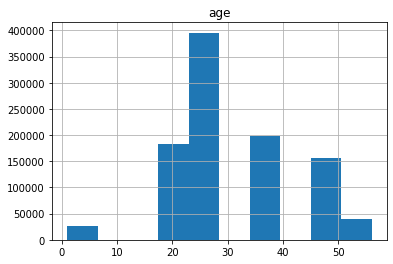

In [24]:
master_data1.hist(column = 'age')

#### (ii) Viewing user's rating distribution for movie "Toy Story" by histogram

In [25]:
master_data1.rating.value_counts()

4    348971
3    261197
5    226310
2    107557
1     56174
Name: rating, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EB49F5D188>]],
      dtype=object)

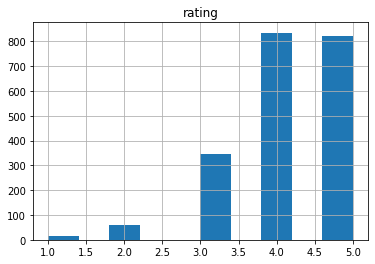

In [26]:
# User rating of the movie “Toy Story” 

master_data1[master_data1.title== "Toy Story (1995)"].hist(column = 'rating')

#### (iii)Top 25 movies by viewership rating

In [27]:
# Sorting the movies in descending order by ratings

rating_sorted = master_data1.sort_values(by='rating', ascending = False)
rating_sorted

,movie_id,title,genres,user_id,age,gender,occupation,rating
0,1,Toy Story (1995),Animation|Children's|Comedy,1,1,F,10,5
489283,2858,American Beauty (1999),Comedy|Drama,5070,25,M,2,5
489259,2599,Election (1999),Comedy,5070,25,M,2,5
489257,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,5070,25,M,2,5
489256,2551,Dead Ringers (1988),Drama|Thriller,5070,25,M,2,5
...,...,...,...,...,...,...,...,...
257036,3484,"Skulls, The (2000)",Thriller,2737,25,M,3,1
573356,1172,Cinema Paradiso (1988),Comedy|Drama|Romance,6006,1,F,0,1
257049,3594,Center Stage (2000),Drama,2737,25,M,3,1
573372,1566,Hercules (1997),Adventure|Animation|Children's|Comedy|Musical,6006,1,F,0,1


In [28]:
# Extracting only required columns

rating_sorted1 = rating_sorted[['movie_id','title']]
rating_sorted1

,movie_id,title
0,1,Toy Story (1995)
489283,2858,American Beauty (1999)
489259,2599,Election (1999)
489257,2571,"Matrix, The (1999)"
489256,2551,Dead Ringers (1988)
...,...,...
257036,3484,"Skulls, The (2000)"
573356,1172,Cinema Paradiso (1988)
257049,3594,Center Stage (2000)
573372,1566,Hercules (1997)


In [29]:
# Removing duplicate rows if any

rating_sorted1.drop_duplicates()

,movie_id,title
0,1,Toy Story (1995)
489283,2858,American Beauty (1999)
489259,2599,Election (1999)
489257,2571,"Matrix, The (1999)"
489256,2551,Dead Ringers (1988)
...,...,...
605976,2213,Waltzes from Vienna (1933)
845139,826,Diebinnen (1995)
842481,655,Mutters Courage (1995)
887219,127,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [30]:
# Extracting Top 25 movies by ratings

top_25_movies = rating_sorted1.drop_duplicates()[0:25]
top_25_movies

,movie_id,title
0,1,Toy Story (1995)
489283,2858,American Beauty (1999)
489259,2599,Election (1999)
489257,2571,"Matrix, The (1999)"
489256,2551,Dead Ringers (1988)
489237,2395,Rushmore (1998)
489236,2391,"Simple Plan, A (1998)"
489226,2330,Hands on a Hard Body (1996)
489224,2321,Pleasantville (1998)
489212,2248,Say Anything... (1989)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EB45FF5C08>]],
      dtype=object)

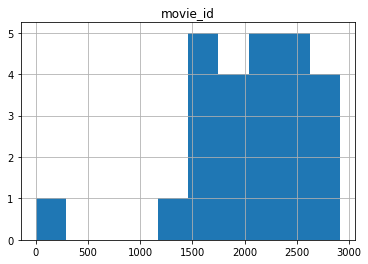

In [31]:
# Visualizing top 25 movie's rating distribution

top_25_movies.hist(column = 'movie_id')

#### (iv) Viewing movies and rating distribution for user_id = 2696

In [32]:
# ratings for all the movies reviewed by for a particular user of user id = 2696

user_2696_movies = master_data1.loc[master_data1.user_id == 2696,['title','rating']]
user_2696_movies

,title,rating
991035,"Client, The (1994)",3
991036,Lone Star (1996),5
991037,Basic Instinct (1992),4
991038,E.T. the Extra-Terrestrial (1982),3
991039,"Shining, The (1980)",4
991040,Back to the Future (1985),2
991041,Cop Land (1997),3
991042,L.A. Confidential (1997),4
991043,"Game, The (1997)",4
991044,I Know What You Did Last Summer (1997),2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EB4A0542C8>]],
      dtype=object)

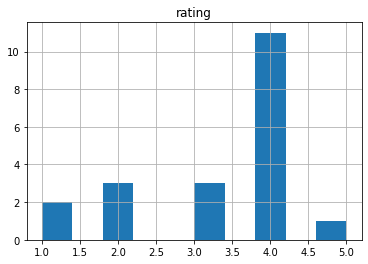

In [33]:
user_2696_movies.hist()

## # Feature Engineering

### * Finding unique Genres

In [34]:
# Splitting the genres column value into separate columns

A = movies.genres.str.split('|',expand = True)
A

,0,1,2,3,4,5
0,Animation,Children's,Comedy,None,None,None
1,Adventure,Children's,Fantasy,None,None,None
2,Comedy,Romance,None,None,None,None
3,Comedy,Drama,None,None,None,None
4,Comedy,None,None,None,None,None
...,...,...,...,...,...,...
3878,Comedy,None,None,None,None,None
3879,Drama,None,None,None,None,None
3880,Drama,None,None,None,None,None
3881,Drama,None,None,None,None,None


#### Checking mostly popular genres by no. of value counts

In [35]:
A[0].value_counts()

Drama          1176
Comedy         1024
Action          503
Horror          262
Adventure       155
Crime           131
Documentary     123
Thriller        101
Animation        90
Children's       89
Romance          50
Sci-Fi           46
Mystery          36
Western          33
Film-Noir        25
Musical          25
War              12
Fantasy           2
Name: 0, dtype: int64

In [36]:
# Creating Set to extract unique list of genres

genre_set = set(A[0]).union((set(A[1]))).union((set(A[2]))).union((set(A[3]))).union((set(A[4]))).union((set(A[5])))

unique_genres = list(genre_set)

unique_genres.remove(None)
unique_genres

['Sci-Fi',
 'Musical',
 'Drama',
 'Western',
 'Mystery',
 'Fantasy',
 'Documentary',
 'Animation',
 'War',
 'Adventure',
 'Crime',
 'Thriller',
 'Romance',
 'Film-Noir',
 'Action',
 'Horror',
 'Comedy',
 "Children's"]

###  * Creating column for each genre category with hot encoding (0 and 1)

In [37]:
df = master_data1.copy()
df.head()

,movie_id,title,genres,user_id,age,gender,occupation,rating
0,1,Toy Story (1995),Animation|Children's|Comedy,1,1,F,10,5
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,1,F,10,5
2,150,Apollo 13 (1995),Drama,1,1,F,10,5
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,1,F,10,4
4,527,Schindler's List (1993),Drama|War,1,1,F,10,5


In [38]:
# Using For Loop for creating new columns for each Genre

for gen in unique_genres:
    df[gen] = df['genres'].str.contains(gen)*1

In [39]:
df.head()

,movie_id,title,genres,user_id,age,gender,occupation,rating,Sci-Fi,Musical,...,War,Adventure,Crime,Thriller,Romance,Film-Noir,Action,Horror,Comedy,Children's
0,1,Toy Story (1995),Animation|Children's|Comedy,1,1,F,10,5,0,0,...,0,0,0,0,0,0,0,0,1,1
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,1,F,10,5,0,1,...,0,0,0,0,1,0,0,0,0,1
2,150,Apollo 13 (1995),Drama,1,1,F,10,5,0,0,...,0,0,0,0,0,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,1,F,10,4,1,0,...,0,1,0,0,0,0,1,0,0,0
4,527,Schindler's List (1993),Drama|War,1,1,F,10,5,0,0,...,1,0,0,0,0,0,0,0,0,0


In [40]:
df.drop(columns =['movie_id', 'title', 'genres', 'user_id'], inplace = True)

In [41]:
df.head()

,age,gender,occupation,rating,Sci-Fi,Musical,Drama,Western,Mystery,Fantasy,...,War,Adventure,Crime,Thriller,Romance,Film-Noir,Action,Horror,Comedy,Children's
0,1,F,10,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,1,F,10,5,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,F,10,5,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,F,10,4,1,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
4,1,F,10,5,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


### * Feature Selection:
1. Based on contextual analysis and domain knowledge, it is concluded that movie_id, user_id, zip, timestamp are the features that do not affect the movie rating.
2. Age, Gender and Occupation would be considered as affecting feature the trget variables and would be taken for further model building.

### * Model to predict movie ratings

In [42]:
# Importing Scikit-learn Package

import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [43]:
master_data_new = master_data1[['age','gender','occupation','genres','rating']]
master_data_new.head()

,age,gender,occupation,genres,rating
0,1,F,10,Animation|Children's|Comedy,5
1,1,F,10,Animation|Children's|Musical|Romance,5
2,1,F,10,Drama,5
3,1,F,10,Action|Adventure|Fantasy|Sci-Fi,4
4,1,F,10,Drama|War,5


In [44]:
master_data_new1 = pd.get_dummies(master_data_new)

In [45]:
master_data_new1.head()

,age,occupation,rating,gender_F,gender_M,genres_Action,genres_Action|Adventure,genres_Action|Adventure|Animation,genres_Action|Adventure|Animation|Children's|Fantasy,genres_Action|Adventure|Animation|Horror|Sci-Fi,...,genres_Romance|Thriller,genres_Romance|War,genres_Romance|Western,genres_Sci-Fi,genres_Sci-Fi|Thriller,genres_Sci-Fi|Thriller|War,genres_Sci-Fi|War,genres_Thriller,genres_War,genres_Western
0,1,10,5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,10,5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,10,5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,10,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,10,5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
master_data_new1.columns

Index(['age', 'occupation', 'rating', 'gender_F', 'gender_M', 'genres_Action',
       'genres_Action|Adventure', 'genres_Action|Adventure|Animation',
       'genres_Action|Adventure|Animation|Children's|Fantasy',
       'genres_Action|Adventure|Animation|Horror|Sci-Fi',
       ...
       'genres_Romance|Thriller', 'genres_Romance|War',
       'genres_Romance|Western', 'genres_Sci-Fi', 'genres_Sci-Fi|Thriller',
       'genres_Sci-Fi|Thriller|War', 'genres_Sci-Fi|War', 'genres_Thriller',
       'genres_War', 'genres_Western'],
      dtype='object', length=306)

In [47]:
master_data_new2 = master_data_new1[['age','gender_F','gender_M','genres_Drama','genres_Comedy',
                                     'genres_Horror','genres_Comedy|Drama','genres_Comedy|Romance','rating']]

In [48]:
master_data_new2.head()

,age,gender_F,gender_M,genres_Drama,genres_Comedy,genres_Horror,genres_Comedy|Drama,genres_Comedy|Romance,rating
0,1,1,0,0,0,0,0,0,5
1,1,1,0,0,0,0,0,0,5
2,1,1,0,1,0,0,0,0,5
3,1,1,0,0,0,0,0,0,4
4,1,1,0,0,0,0,0,0,5


In [49]:
master_data_new2.dtypes

age                      int64
gender_F                 uint8
gender_M                 uint8
genres_Drama             uint8
genres_Comedy            uint8
genres_Horror            uint8
genres_Comedy|Drama      uint8
genres_Comedy|Romance    uint8
rating                   int64
dtype: object

In [50]:
# Defining function for rating column to get binary value 0 & 1

def fn(x):
    if x>3:
        return 1
    else:
        return 0

In [51]:
# Creating new rating column with 0 and 1 rating

master_data_new2['rating_new'] = master_data_new2['rating'].apply(fn)
master_data_new2.head()

C:\Users\sinku\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,age,gender_F,gender_M,genres_Drama,genres_Comedy,genres_Horror,genres_Comedy|Drama,genres_Comedy|Romance,rating,rating_new
0,1,1,0,0,0,0,0,0,5,1
1,1,1,0,0,0,0,0,0,5,1
2,1,1,0,1,0,0,0,0,5,1
3,1,1,0,0,0,0,0,0,4,1
4,1,1,0,0,0,0,0,0,5,1


In [52]:
# Dropping old rating column

master_data_new3 = master_data_new2.drop(columns = ['rating'])
master_data_new3.head()

,age,gender_F,gender_M,genres_Drama,genres_Comedy,genres_Horror,genres_Comedy|Drama,genres_Comedy|Romance,rating_new
0,1,1,0,0,0,0,0,0,1
1,1,1,0,0,0,0,0,0,1
2,1,1,0,1,0,0,0,0,1
3,1,1,0,0,0,0,0,0,1
4,1,1,0,0,0,0,0,0,1


In [53]:
master_data_new3.T

,0,1,2,3,4,5,6,7,8,9,...,1000199,1000200,1000201,1000202,1000203,1000204,1000205,1000206,1000207,1000208
age,1,1,1,1,1,1,1,1,1,1,...,25,25,25,25,25,25,25,25,25,25
gender_F,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
gender_M,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
genres_Drama,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
genres_Comedy,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
genres_Horror,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
genres_Comedy|Drama,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
genres_Comedy|Romance,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
rating_new,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,0,1,0,1,0,1


In [54]:
master_data_new3.dtypes

age                      int64
gender_F                 uint8
gender_M                 uint8
genres_Drama             uint8
genres_Comedy            uint8
genres_Horror            uint8
genres_Comedy|Drama      uint8
genres_Comedy|Romance    uint8
rating_new               int64
dtype: object

In [55]:
master_data_new3.columns

Index(['age', 'gender_F', 'gender_M', 'genres_Drama', 'genres_Comedy',
       'genres_Horror', 'genres_Comedy|Drama', 'genres_Comedy|Romance',
       'rating_new'],
      dtype='object')

In [56]:
# Defining feature variables and response variable

feature_cols = ['age', 'gender_F', 'gender_M', 'genres_Drama', 'genres_Comedy',
       'genres_Horror', 'genres_Comedy|Drama']

x = master_data_new3[feature_cols]
y = master_data_new3.rating_new

In [57]:
x.head()

,age,gender_F,gender_M,genres_Drama,genres_Comedy,genres_Horror,genres_Comedy|Drama
0,1,1,0,0,0,0,0
1,1,1,0,0,0,0,0
2,1,1,0,1,0,0,0
3,1,1,0,0,0,0,0
4,1,1,0,0,0,0,0


In [58]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: rating_new, dtype: int64

In [59]:
# Splitting the dataset into training set (75%) and test set (25%)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 1)

In [60]:
x_train.shape

(750156, 7)

In [61]:
y_train.shape

(750156,)

In [62]:
x_test.shape

(250053, 7)

In [63]:
y_test.shape

(250053,)

[Text(167.4, 190.26, 'node #0\ngenres_Drama <= 0.5\nsamples = 750156\nvalue = [375078.0, 375078.0]\nclass = good'),
 Text(83.7, 135.9, '#1\ngenres_Horror <= 0.5\n666608\n[340872.14, 327714.83]\nbad'),
 Text(41.85, 81.53999999999999, '#2\nage <= 30.0\n649775\n[329141.79, 321745.65]\nbad'),
 Text(20.925, 27.180000000000007, '#3\n396884\n[208449.64, 191051.23]\nbad'),
 Text(62.775000000000006, 27.180000000000007, '#4\n252891\n[120692.15, 130694.42]\ngood'),
 Text(125.55000000000001, 81.53999999999999, '#5\nage <= 9.5\n16833\n[11730.35, 5969.18]\nbad'),
 Text(104.625, 27.180000000000007, '#6\n465\n[289.55, 190.37]\nbad'),
 Text(146.475, 27.180000000000007, '#7\n16368\n[11440.8, 5778.82]\nbad'),
 Text(251.10000000000002, 135.9, '#8\nage <= 47.5\n83548\n[34205.86, 47363.17]\ngood'),
 Text(209.25, 81.53999999999999, '#9\nage <= 30.0\n71727\n[30118.01, 40106.62]\ngood'),
 Text(188.32500000000002, 27.180000000000007, '#10\n47049\n[20039.05, 26098.55]\ngood'),
 Text(230.175, 27.180000000000007, 

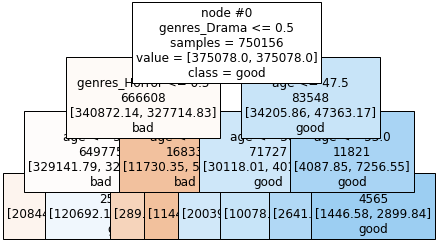

In [64]:
clf1 = DecisionTreeClassifier(max_depth=3, class_weight = 'balanced')

clf2 = clf1.fit(x_train, y_train)

tree.plot_tree(clf2, feature_names=feature_cols,class_names=['bad','good'], label='root',
                filled=True, impurity=False, node_ids=True, proportion=False, rotate='deprecated',
                rounded=False, precision=2, fontsize=12,)

In [65]:
y_pred = clf2.predict(x_test)
y_pred

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [66]:
y_test

630120    1
229398    1
758377    0
159240    1
254252    1
         ..
674730    0
719707    0
173177    1
275032    1
325547    0
Name: rating_new, Length: 250053, dtype: int64

In [68]:
metrics.accuracy_score(y_test, y_pred)

0.5221373068909391